In [19]:
#####
## The aim of this script is to take the y,x coordinate of a point in elipse1 and 
#   transfer it to the corresponding y',x' coordinate in elipse2

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Drawing ellipse1
x0 = 80; a = 50  # x center, half width                                       
y0 = 120; b = 100  # y center, half height 
x = np.linspace(0, 150,150)  # x values of interest
y = np.linspace(0, 250,250)[:,None]  # y values of interest, as a "ellipse" array
ellipse = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse
ellipse = ellipse.astype(int)

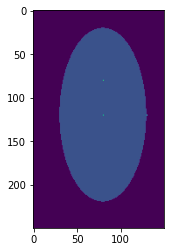

In [34]:
#definning the point-of-interest (y,x) and drawing center, start (Sy,Sx) and (y,x)
S_radian = np.radians(0)
Sy, Sx = int(y0+b*np.sin(S_radian)), int(x0+a*np.cos(S_radian))
y, x = 80, 80
ellipse[y0,x0] = 4
ellipse[Sy,Sx] = 4
ellipse[y,x] = 4

plt.imshow(ellipse)

In [35]:
#getting angle (in radians) between start and point-of-interest
vect, ref = (y-y0,x-x0), (Sy-y0,Sx-x0)
unit_vector_1 = vect/np.linalg.norm(vect)
unit_vector_2 = ref / np.linalg.norm(ref)
dot_product = np.dot(unit_vector_1, unit_vector_2)
p_radian = np.arccos(dot_product)
p_deg = np.degrees(p_radian)
# if vect[0]<0: ### this is a stupid solution to make the angle clockwise, but it works here
#     p_deg = 360 - p_deg
#     p_radian = np.radians(p_deg)
print(p_radian, p_deg)

1.5707963267948966 90.0


In [36]:
#finding the point based on the angle, center and diameters
# Py, Px = int(y0+b*np.sin(p_radian)), int(x0+a*np.cos(p_radian))  THIS SOLUTION DIDN't WORK
# Py1 = y0+(Px1-x0)/np.arctan(p_radian)

#the solution that worked
if vect[-1]<0:
    Px1 = int(x0-a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))) 
else:
    Px1 = int(x0+a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))) 
if vect[0]<0:
    Py1 = y0-int(np.sqrt((np.tan(p_radian)*(Px1-x0))**2))
else:
    Py1 = y0+int(np.sqrt((np.tan(p_radian)*(Px1-x0))**2))
# Py1 = int(y0+a*b/(np.sqrt(a**2+b**2*np.tan(p_radian)**2)))
Py1, Px1

(120, 80)

In [37]:
# Py1, Px1 = 218, 80

the point is in the ellipse 4
angle to found point nan nan


/var/folders/5d/tj6rj8cn7_xdplpgkz202g5rnq_4v2/T/ipykernel_68442/2888638461.py:5: RuntimeWarning: invalid value encountered in true_divide
  unit_vector_1 = vect2/np.linalg.norm(vect2)


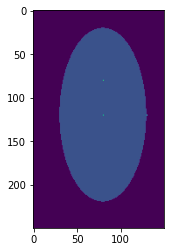

In [38]:
### THE CORRECT POINTS ARE (FROM THE SHAPE and CONFIRMED BY ANGLE FROM START)
Py2, Px2 = Py1, Px1
print('the point is in the ellipse', ellipse[Py2,Px2]) ### the point is in the ellipse
vect2, ref = (Py2-y0,Px2-x0), (Sy-y0,Sx-x0)
unit_vector_1 = vect2/np.linalg.norm(vect2)
unit_vector_2 = ref / np.linalg.norm(ref)
dot_product2 = np.dot(unit_vector_1, unit_vector_2)
p_radian2 = np.arccos(dot_product2)
p_deg2 = np.degrees(p_radian2)
print('angle to found point', p_deg2, p_radian2)
ellipse[Py2,Px2] = 4
plt.imshow(ellipse)

In [39]:
# Py1,Px1 = 218,80
vect, cross = (y-y0,x-x0), (Py1-y0,Px1-x0)
vect_length = np.linalg.norm(vect)
cross_length = np.linalg.norm(cross)
ratio = vect_length/cross_length 
vect, cross, vect_length, cross_length, ratio

/var/folders/5d/tj6rj8cn7_xdplpgkz202g5rnq_4v2/T/ipykernel_68442/1500330915.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = vect_length/cross_length


((-40, 0), (0, 0), 40.0, 0.0, inf)

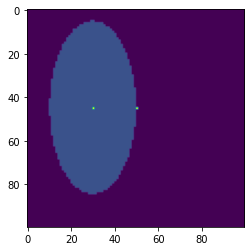

In [40]:
# Drawing ellipse2
x0 = 30; a = 20  # x center, half width                                       
y0 = 45; b = 40  # y center, half height 
x = np.linspace(0, 100,100)  # x values of interest
y = np.linspace(0, 100,100)[:,None]  # y values of interest, as a "ellipse" array
ellipse2 = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse
ellipse2 = ellipse2.astype(int)
#definning the point-of-interest (y,x) and drawing center, start (Sy,Sx) and (y,x)
S_radian = np.radians(0)
Sy, Sx = int(y0+b*np.sin(S_radian)), int(x0+a*np.cos(S_radian))
# y, x = 155, 50
ellipse2[y0,x0] = 4
ellipse2[Sy,Sx] = 4
# ellipse[y,x] = 4
plt.imshow(ellipse2)

In [41]:
x0, a, b, np.tan(p_radian)

(30, 20, 40, 1.633123935319537e+16)

45 30


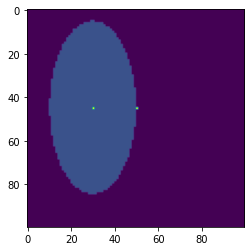

In [42]:
#finding the point based on the angle, center and diameters
# Py, Px = int(y0+b*np.sin(p_radian)), int(x0+a*np.cos(p_radian))  THIS SOLUTION DIDN't WORK
if vect[-1]<0:
    Px1 = int(x0-a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))) 
else:
    Px1 = int(x0+a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))) 
#### Px1 is off by 1 only
# Py1 = y0+(Px1-x0)/np.arctan(p_radian)
if vect[0]<0:
    Py1 = y0-int(np.tan(p_radian)*(Px1-x0))
else:
    Py1 = y0+int(np.tan(p_radian)*(Px1-x0))
# Py1 = int(y0+a*b/(np.sqrt(a**2+b**2*np.tan(p_radian)**2)))
print(Py1, Px1)
ellipse2[Py1,Px1] = 4
plt.imshow(ellipse2)

In [31]:
cross2 = (Py1-y0,Px1-x0)
cross2_length = np.linalg.norm(cross2)
vect2_length = ratio*cross2_length
vect2_length, cross2_length, ratio, p_radian, p_deg

(8.0, 20.0, 0.4, 3.141592653589793, 180.0)

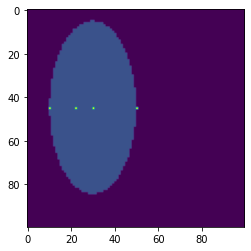

In [32]:
if Py1 < y0:
    y = y0-int(vect2_length*np.sqrt(np.sin(p_radian)**2))
else:
    y = y0+int(vect2_length*np.sqrt(np.sin(p_radian)**2))
if Px1 < x0:
    x = x0-int(vect2_length*np.sqrt(np.cos(p_radian)**2))
else:
    x = x0+int(vect2_length*np.sqrt(np.cos(p_radian)**2))
ellipse2[y,x] = 4
plt.imshow(ellipse2)

In [80]:
def transform_point(y=200, x=80, 
                    x0=80, y0=120, #center of ellipse1 
                    a0=50, b0=100, #major and minor of ellispe1
                    x1=30, y1=45, #center of ellipse2 (ref)
                    a1=20, b1=40, # major and minor of ellipse2
                    X_length=150, #X_dim of final array
                    Y_length=250): #Y_dim of final array
    """
    This function transform the  y,x coordinates of a point in ellipse1 
    to y_f,x_f coordinate of the corresponding point in ellipse2
    INPUT: y,x coordinates of the point in ellipse1 
           y0,x0,a0,b0 center and dimaters of ellipse1 
           y1,x1,a1,b1 center and dimaters of ellipse2
    Returns y_f, x_f coordinates of the corresponding point in ellipse2
    NOTE: the point has to be inside the ellipse1 and not on the boarder
    """
    
    # Drawing ellipse1 
    # X_dim = np.linspace(0, X_length,X_length)  # x values of interest
    # Y_dim = np.linspace(0, Y_length,Y_length)[:,None]  # y values of interest, as a "ellipse" array
    # ellipse = ((X_dim-x0)/a0)**2 + ((Y_dim-y0)/b0)**2 <= 1  # True for points inside the ellipse
    # ellipse = ellipse.astype(int)
    #definning the point-of-interest (y,x) and drawing center, start (Sy,Sx) and (y,x)
    # Drawing ellipse2
    # ellipse1 = ((X_dim-x1)/a1)**2 + ((Y_dim-y1)/b1)**2 <= 1  # True for points inside the ellipse
    # ellipse1 = ellipse1.astype(int)
    # Sy1, Sx1 = int(y1+b1*np.sin(S_radian)), int(x1+a1*np.cos(S_radian))

    #definning start point for calculating angle
    S_radian = np.radians(0)
    Sy0, Sx0 = int(y0+b0*np.sin(S_radian)), int(x0+a0*np.cos(S_radian))
    
    #getting angle (in radians) between start and point-of-interest
    vect, ref = (y-y0,x-x0), (Sy0-y0,Sx0-x0)
    unit_vector_1 = vect/np.linalg.norm(vect)
    unit_vector_2 = ref / np.linalg.norm(ref)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    p_radian = np.arccos(dot_product)
    #finding the cross point in ellipse1 based on the angle, center and diameters
    if vect[-1]<0:
        Px0 = int(x0-a0*b0/(np.sqrt(b0**2+a0**2*np.tan(p_radian)**2))) 
    else:
        Px0 = int(x0+a0*b0/(np.sqrt(b0**2+a0**2*np.tan(p_radian)**2))) 
    if vect[0]<0:
        Py0 = y0-int(np.sqrt((np.tan(p_radian)*(Px0-x0))**2))
    else:
        Py0 = y0+int(np.sqrt((np.tan(p_radian)*(Px0-x0))**2))
    
    # calculating ratio of point length to cross length
    cross = (Py0-y0,Px0-x0)
    vect_length = np.linalg.norm(vect)
    cross_length = np.linalg.norm(cross)
    ratio = vect_length/cross_length 

    #finding the cross point in ellipse2 based on the angle, center and diameters
    if vect[-1]<0:
        Px1 = x1-int(a1*b1/(np.sqrt(b1**2+a1**2*np.tan(p_radian)**2))) 
    else:
        Px1 = x1+int(a1*b1/(np.sqrt(b1**2+a1**2*np.tan(p_radian)**2))) 
    if vect[0]<0:
        Py1 = y1-int(np.tan(p_radian)*(Px1-x1))
    else:
        Py1 = y1+int(np.tan(p_radian)*(Px1-x1))
    
    # calculating cross point to ellipse2 and point_length
    cross2 = (Py1-y1,Px1-x1)
    cross2_length = np.linalg.norm(cross2)
    vect2_length = ratio*cross2_length

    # x_f, x_f coordinated of the transformed point from ellipse1 to ellipse2
    if Py1 < y1:
        y_f = y1-int(vect2_length*np.sqrt(np.sin(p_radian)**2))
    else:
        y_f = y1+int(vect2_length*np.sqrt(np.sin(p_radian)**2))
    if Px1 < x1:
        x_f = x1-int(vect2_length*np.sqrt(np.cos(p_radian)**2))
    else:
        x_f = x1+int(vect2_length*np.sqrt(np.cos(p_radian)**2))

    return y_f, x_f

In [81]:
y_final, x_final = transform_point(y=130, x=80, 
                                    x0=80, y0=120, #center of ellipse1 
                                    a0=50, b0=100, #major and minor of ellispe1
                                    x1=30, y1=45, #center of ellipse2 (ref)
                                    a1=20, b1=40, # major and minor of ellipse2
                                    X_length=150, #X_dim of final array
                                    Y_length=250) #Y_dim of final array

/var/folders/5d/tj6rj8cn7_xdplpgkz202g5rnq_4v2/T/ipykernel_68149/164901980.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = vect_length/cross_length
/var/folders/5d/tj6rj8cn7_xdplpgkz202g5rnq_4v2/T/ipykernel_68149/164901980.py:68: RuntimeWarning: invalid value encountered in double_scalars
  vect2_length = ratio*cross2_length


ValueError: cannot convert float NaN to integer

In [13]:
y_final, x_final

(48, 30)

In [ ]:
plt.imshow(ellipse)
# plt.imshow(ellipse1)

In [34]:
120-int(np.tan(1.5707963267948966)*(80-80))

120